In [42]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import cv2


9


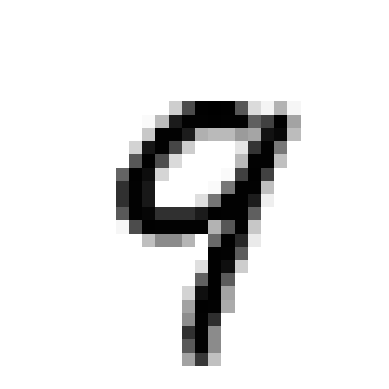

In [24]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
plt.imshow(x_test[12], cmap='binary')
plt.axis('off')
print(y_test[12])

In [3]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15


2023-10-21 09:55:42.366901: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 [==============================] - 37s 84ms/step - loss: 0.3494 - accuracy: 0.8960 - val_loss: 0.0790 - val_accuracy: 0.9797
Epoch 2/15
422/422 [==============================] - 33s 78ms/step - loss: 0.1078 - accuracy: 0.9675 - val_loss: 0.0565 - val_accuracy: 0.9853
Epoch 3/15
422/422 [==============================] - 33s 78ms/step - loss: 0.0832 - accuracy: 0.9746 - val_loss: 0.0444 - val_accuracy: 0.9878
Epoch 4/15
422/422 [==============================] - 34s 81ms/step - loss: 0.0687 - accuracy: 0.9790 - val_loss: 0.0417 - val_accuracy: 0.9878
Epoch 5/15
422/422 [==============================] - 34s 81ms/step - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0352 - val_accuracy: 0.9910
Epoch 6/15
422/422 [==============================] - 33s 78ms/step - loss: 0.0557 - accuracy: 0.9829 - val_loss: 0.0362 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 34s 80ms/step - loss: 0.0478 - accuracy: 0.9847 - val_loss: 0.0353 - val_accuracy: 0.9905
Epo

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.025992611423134804
Test accuracy: 0.9911999702453613


Width: 28
Height: 28
Изображение черно-белое.


(-0.5, 27.5, 27.5, -0.5)

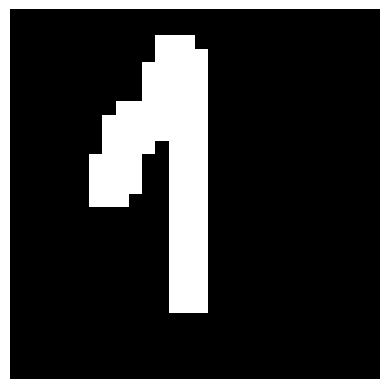

In [72]:
# image = '/home/misha/Изображения/0.png'
# predictions = model.predict(np.array([your_image]))
# predicted_digit = np.argmax(predictions)
# print("Predicted digit:", predicted_digit)
# plt.imshow('/home/misha/Изображения/0.png', cmap='binary')
# plt.imshow(x_test[12], cmap='binary')
# plt.axis('off')
# print(y_test[12])

# Загрузите ваше изображение и измените его размер до 28x28 пикселей
image = Image.open('/home/misha/Изображения/44.png')  # Замените "your_image.jpg" на путь к вашему изображению
image = image.resize((28, 28))
# Получим размер изображения
width, height = image.size

# Выведем размер изображения
print("Width:", width)
print("Height:", height)

# Загрузите изображение
image = cv2.imread('/home/misha/Изображения/44.png', cv2.IMREAD_UNCHANGED)  # Замените путь на ваш путь к изображению

# Проверьте количество каналов
num_channels = image.shape[2] if len(image.shape) == 3 else 1

if num_channels == 1:
    print("Изображение черно-белое.")
else:
    print("Изображение цветное.")

# Загрузите цветное изображение
# image = cv2.imread('/home/misha/Изображения/5.png', cv2.IMREAD_COLOR)  # Замените путь на ваш путь к изображению

# Преобразуйте изображение в черно-белое
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Сохраните черно-белое изображение
# cv2.imwrite('/home/misha/Изображения/05.png', gray_image)

# Загрузите изображение
# image = cv2.imread('/home/misha/Изображения/05.png', cv2.IMREAD_UNCHANGED)  # Замените путь на ваш путь к изображению

# Проверьте количество каналов
# num_channels = image.shape[2] if len(image.shape) == 3 else 1

# if num_channels == 1:
#     print("Изображение черно-белое.")
# else:
#     print("Изображение цветное.")

# Загрузите ваше изображение
image = Image.open("/home/misha/Изображения/44.png")

# Преобразуйте изображение в формат NumPy и выполните масштабирование
your_image = np.array(image)  # Преобразование в NumPy-массив
your_image = your_image.astype("float32") / 255  # Масштабирование пикселей в диапазон [0, 1]

# Убедитесь, что изображение имеет размерность (28, 28, 1)
# your_image = your_image.reshape((28, 28, 1))
your_image = np.expand_dims(your_image, axis=-1)

plt.imshow(image, cmap='binary')
plt.axis('off')

In [73]:
# Выполните инференс
predictions = model.predict(np.array([your_image]))

# Результат predictions будет вероятностным распределением по классам.
# Для получения конкретного числа (предсказанной цифры) можно воспользоваться:
predicted_digit = np.argmax(predictions)

print("Predicted digit:", predicted_digit)

1/1 [==============================] - 0s 35ms/step
Predicted digit: 4
